Replacing nan values with mean and mode and outlier treatment


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')
data_copy = data.copy()
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy.replace(('Rural', 'Semiurban', 'Urban'), (1, 2,3), inplace = True)
data_copy.replace(('Yes', 'No'), (1, 0), inplace = True)
data_copy.replace(('Y', 'N'), (1,0), inplace = True)
data_copy.replace(('Graduate', 'Not Graduate'), (1,0), inplace = True)
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy['Dependents'] = np.where((data_copy.Dependents == '3+'), int('4'), data_copy.Dependents)
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [4]:
print(data_copy.dtypes)
data_copy.isnull().sum()

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#data_copy['Gender'] = data_copy['Gender'].fillna(data_copy['Gender'].mode())
data_copy['Gender'].mode()[0]

1.0

In [23]:
data_copy['Dependents'] = data_copy['Dependents'].fillna(data_copy['Dependents'].mode()[0])
data_copy['Dependents'].mode()[0]

'0'

In [17]:
data_copy['Loan_Status'].mode()

0    1
dtype: int64

In [25]:
data_copy['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [12]:
data_copy['Gender'] = data_copy['Gender'].fillna(data_copy['Gender'].mode())
data_copy['Married'] = data_copy['Married'].fillna(data_copy['Married'].mode())
data_copy['Dependents'] = data_copy['Dependents'].fillna(data_copy['Dependents'].mode()[0])
data_copy['Self_Employed'] = data_copy['Self_Employed'].fillna(data_copy['Self_Employed'].mode()[0])
data_copy['ApplicantIncome'] = data_copy['ApplicantIncome'].fillna(data_copy['ApplicantIncome'].mean())
data_copy['CoapplicantIncome'] = data_copy['CoapplicantIncome'].fillna(data_copy['CoapplicantIncome'].mean())
data_copy['LoanAmount'] = data_copy['LoanAmount'].fillna(data_copy['LoanAmount'].mean())
data_copy['Loan_Amount_Term'] = data_copy['Loan_Amount_Term'].fillna(data_copy['Loan_Amount_Term'].mode()[0])
data_copy['Credit_History'] = data_copy['Credit_History'].fillna(data_copy['Credit_History'].mode()[0])
data_copy['Property_Area'] = data_copy['Property_Area'].fillna(data_copy['Property_Area'].mode()[0])
data_copy['Loan_Status'] = data_copy['Loan_Status'].fillna(data_copy['Loan_Status'].mode()[0])
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


In [8]:
data_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

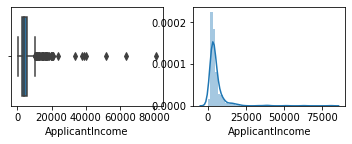

In [9]:
plt.subplot(2,2,1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data['ApplicantIncome'])

In [10]:
data_copy['ApplicantIncome'] = np.log10(data_copy['ApplicantIncome'])
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,3.767082,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0.0,3.661150,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0,1,1.0,3.477121,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0.0,3.412124,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0.0,3.778151,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,3.462398,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,4,1,0.0,3.613419,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1,1,0.0,3.906981,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0.0,3.879841,0.0,187.000000,360.0,1.0,3,1


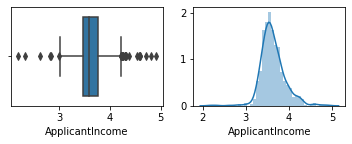

In [11]:
plt.subplot(2,2,1)
sns.boxplot(data_copy['ApplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data_copy['ApplicantIncome'])

In [12]:
X = data_copy[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data_copy['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
logreg.predict_proba(X_test)[:,1]

array([0.75365742, 0.75116343, 0.82400389, 0.79664861, 0.75887881,
       0.79611802, 0.14866195, 0.85149174, 0.76102148, 0.80385848,
       0.81372296, 0.84694839, 0.85820867, 0.74164334, 0.1965438 ,
       0.67213803, 0.85943242, 0.78916496, 0.67932592, 0.77977824,
       0.84545517, 0.78818834, 0.82330774, 0.24256829, 0.71092574,
       0.81858039, 0.85881544, 0.61996405, 0.84127014, 0.83097311,
       0.84081191, 0.80509664, 0.95707921, 0.20865098, 0.72167723,
       0.81604831, 0.70442279, 0.81037098, 0.80304272, 0.7760504 ,
       0.79478965, 0.84000042, 0.67541054, 0.78594997, 0.72287201,
       0.78834815, 0.83975373, 0.73672166, 0.7922792 , 0.78673796,
       0.85953025, 0.75937109, 0.80302602, 0.79962067, 0.20963277,
       0.70601083, 0.66253611, 0.19893905, 0.80632971, 0.88734392,
       0.79655502, 0.80736282, 0.83055508, 0.70430159, 0.94067607,
       0.67207113, 0.78639776, 0.9216684 , 0.80093338, 0.78655272,
       0.80448581, 0.7547009 , 0.77945877, 0.20650534, 0.49001

In [14]:
logreg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [15]:
logreg_accuracy = logreg.score(X_test, y_test)
print("Logistic Regression accuracy is ", logreg_accuracy )

Logistic Regression accuracy is  0.7886178861788617


In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree_predictions = decision_tree.predict(X_test)
accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is  ", accuracy_dt)

Decision Tree accuracy is   0.7154471544715447


In [17]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_accuracy = adaboost.score(X_test, y_test)
print("AdaBoost Accuracy is ", adaboost_accuracy)

AdaBoost Accuracy is  0.7804878048780488


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_accuracy = gbc.score(X_test, y_test)
print("GradientBoostingClassifier acuracy is ", gbc_accuracy)

GradientBoostingClassifier acuracy is  0.7886178861788617


In [19]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
ranfor_accuracy = ranfor.score(X_test, y_test)
print("RandomForest Accuracy is ", ranfor_accuracy)

RandomForest Accuracy is  0.7560975609756098
